In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

### Data Set Characteristics:

##### Number of Instances:
 	
20640

##### Number of Attributes:
 	
8 numeric, predictive attributes and the target

##### Attribute Information:
 	
* MedInc median income in block
* HouseAge median house age in block
* AveRooms average number of rooms
* AveBedrms average number of bedrooms
* Population block population
* AveOccup average house occupancy
* Latitude house block latitude
* Longitude house block longitude

#### Target

The target variable is the median house value in units of 100,000 for California districts.

In [17]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [18]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, test_size = 0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.1, random_state=42)

In [19]:
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_valid_norm = sc.transform(X_valid)
X_test_norm = sc.transform(X_test)


In [20]:
y_train = np.array(y_train)
y_valid = np.array(y_valid)
y_test = np.array(y_test)

# Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

In [21]:
input_ = keras.layers.Input(shape=X_train_norm.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [22]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           270         input_2[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 30)           930         dense_3[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 38)           0           input_2[0][0]                    
                                                                 dense_4[0][0]              

In [23]:
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(lr=1e-3), 
              metrics=['mae'])

In [24]:
model_history = model.fit(X_train_norm, y_train, epochs=80, validation_data=(X_valid_norm, y_valid))

Epoch 1/80
523/523 [==============================] - 1s 1ms/step - loss: 2.9153 - mae: 1.2595 - val_loss: 0.7717 - val_mae: 0.6284
Epoch 2/80
523/523 [==============================] - 1s 1ms/step - loss: 0.7101 - mae: 0.6210 - val_loss: 0.6914 - val_mae: 0.5975
Epoch 3/80
523/523 [==============================] - 1s 1ms/step - loss: 0.6660 - mae: 0.5944 - val_loss: 0.6586 - val_mae: 0.5779
Epoch 4/80
523/523 [==============================] - 2s 3ms/step - loss: 0.6154 - mae: 0.5715 - val_loss: 0.6218 - val_mae: 0.5616
Epoch 5/80
523/523 [==============================] - 1s 1ms/step - loss: 0.5788 - mae: 0.5524 - val_loss: 0.6030 - val_mae: 0.5542
Epoch 6/80
523/523 [==============================] - 1s 1ms/step - loss: 0.5604 - mae: 0.5484 - val_loss: 0.5887 - val_mae: 0.5437
Epoch 7/80
523/523 [==============================] - 1s 1ms/step - loss: 0.5357 - mae: 0.5286 - val_loss: 0.5640 - val_mae: 0.5350
Epoch 8/80
523/523 [==============================] - 1s 1ms/step - loss: 0.

In [25]:
mae_test = model.evaluate(X_test_norm, y_test)


65/65 [==============================] - 0s 853us/step - loss: 0.3778 - mae: 0.4313


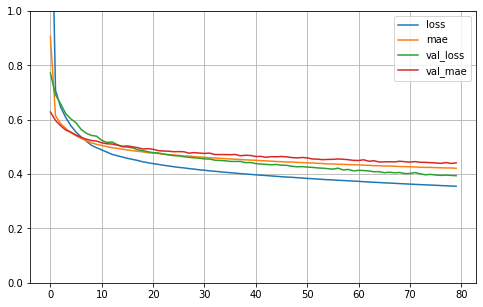

In [26]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [27]:
X_test_norm.shape

(2064, 8)

In [28]:
r = np.random.randint(1,2064, size = 3)
r

array([ 659, 1271, 1093])

In [29]:
X_new = X_test_norm[r]
Y_new = y_test[r]

In [30]:
y_pred = model.predict(X_new)
print (y_pred)
print(Y_new)

[[2.504011 ]
 [1.9311919]
 [3.0673294]]
[2.18  1.739 4.611]
